## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 2. Data Undersranding and Preprocessing

### 2.1 Data Understanding 

In [2]:
news_df = pd.read_csv("E:/year3_sem2/COMP4432/project/abcnews-date-text.csv")
news_df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [3]:
news_df.shape

(1244184, 2)

1, 244, 184 headlines in total

#### 2.1.1 Statistical situation

In [4]:
grouped = news_df.groupby('publish_date').size().reset_index(name='count')
grouped

,publish_date,count
0,20030219,198
1,20030220,250
2,20030221,250
3,20030222,126
4,20030223,136
...,...,...
6877,20211227,31
6878,20211228,34
6879,20211229,28
6880,20211230,28


In [5]:
grouped['count'].describe()

count    6882.000000
mean      180.788143
std        84.916556
min         1.000000
25%       108.000000
50%       191.500000
75%       245.000000
max       384.000000
Name: count, dtype: float64

In [6]:
grouped  = grouped.sort_values(by='count', ascending=False)
grouped

,publish_date,count
3466,20120824,384
3697,20130412,383
2917,20110222,380
3456,20120814,379
3729,20130514,378
...,...,...
6672,20210605,6
6812,20211023,5
6651,20210515,5
6734,20210806,1


length

In [7]:
total_length = sum(len(text.split()) for text in news_df['headline_text'])

In [8]:
total_length

8158765

In [9]:
unique_words = set()
for text in news_df['headline_text']:
    words = text.split()
    unique_words.update(words)

total_unique_words = len(unique_words)
print("Total unique words:", total_unique_words)

Total unique words: 118046


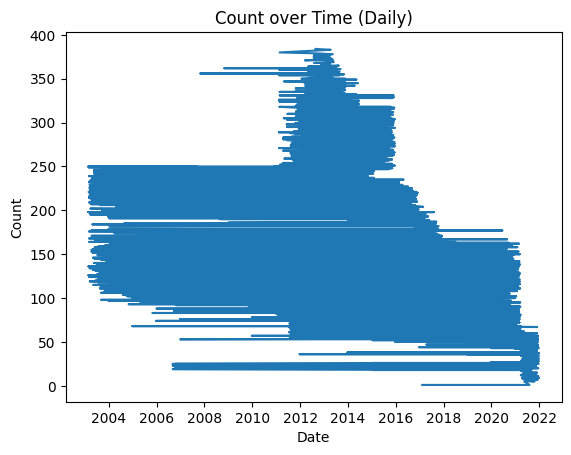

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

grouped['publish_date'] = pd.to_datetime(grouped['publish_date'], format='%Y%m%d')


plt.plot(grouped['publish_date'], grouped['count'])


plt.title('Count over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Count')


plt.show()

In [11]:
grouped_monthly = grouped.resample('M', on='publish_date').sum()
grouped_monthly

C:\Users\Administrator\AppData\Local\Temp\ipykernel_39872\3285998068.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped_monthly = grouped.resample('M', on='publish_date').sum()


,count
publish_date,
2003-02-28,2180
2003-03-31,6410
2003-04-30,6101
2003-05-31,6399
2003-06-30,6346
...,...
2021-08-31,1070
2021-09-30,1051
2021-10-31,988


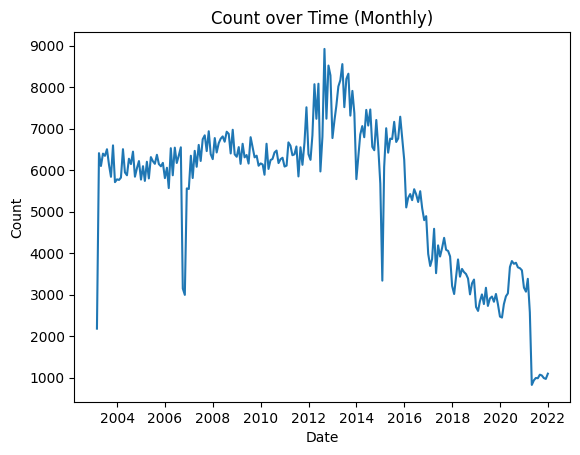

In [12]:
plt.plot(grouped_monthly.index, grouped_monthly['count'])


plt.title('Count over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Count')


plt.show()

#### 2.1.2 Words Level

https://www.kaggle.com/code/rcushen/topic-modelling-with-lsa-and-lda

In [13]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

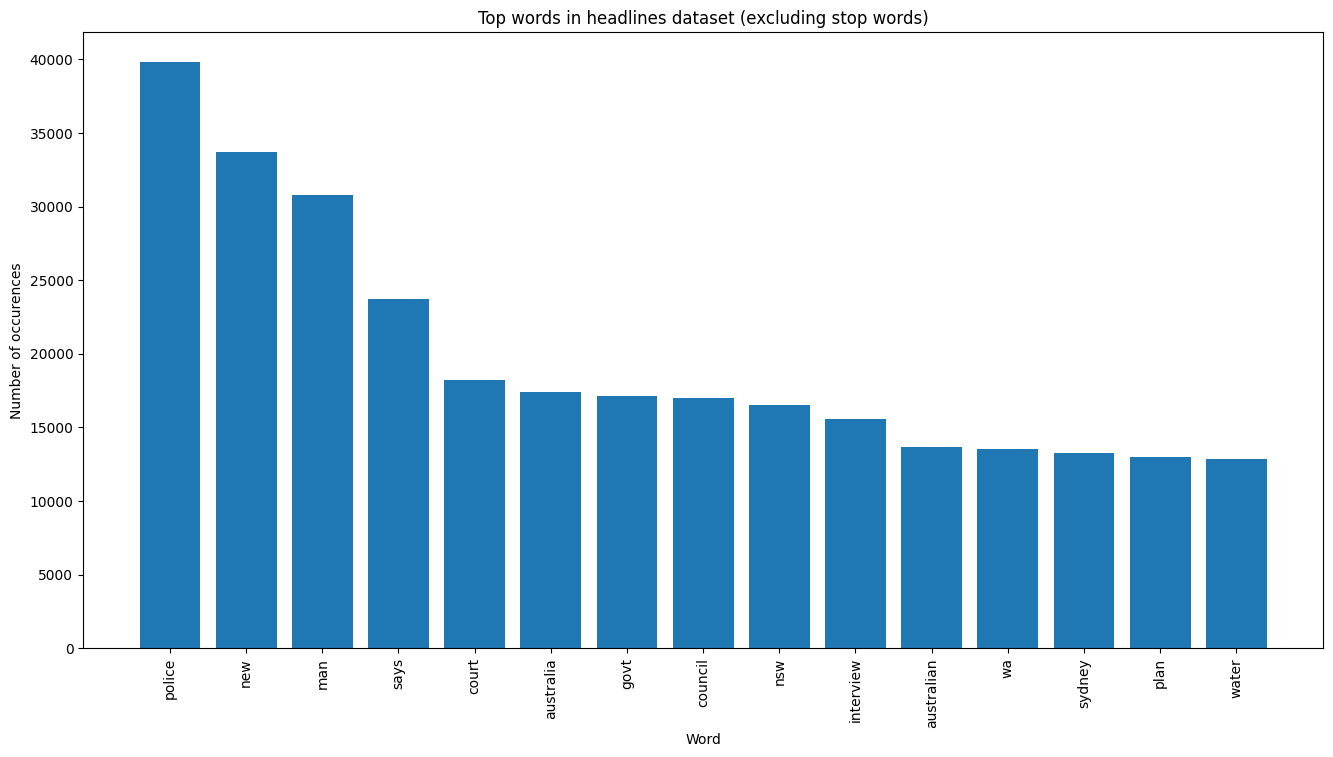

In [14]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=news_df["headline_text"])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

wordclouds

In [15]:
from wordcloud import WordCloud

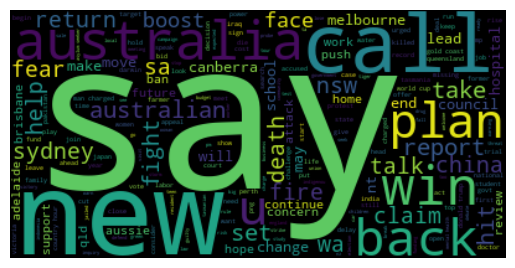

In [16]:
txt = " ".join(headline.lower() for headline in news_df['headline_text'])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2.2 Data Preprocessing

#### 2.2.1 Tokenization

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
def tokenize(headline):
    tokens = word_tokenize(headline)
    
    stop_words = set(stopwords.words('english'))
    
    token_lst = [token for token in tokens if token not in (string.punctuation or stop_words)]
    return token_lst

### 2.2.2 Stemming

In [19]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

In [20]:
def stem_tokens(tokens, stemmer):
    token_lst = []
    for  token in tokens:
        token_lst.append(stemmer.stem(token))
    return token_lst

### 2.2.3 Lemmatization

In [21]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
def process(headline):
    tokens = tokenize(headline)
    
    stemmer = SnowballStemmer('english')
    stem = stem_tokens(tokens, stemmer)
    
    le=WordNetLemmatizer()
    tokens=[le.lemmatize(w) for w in stem]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [23]:
news_df['headline_cleaned_text']=news_df['headline_text'].apply(process)
news_df

,publish_date,headline_text,headline_cleaned_text
0,20030219,aba decides against community broadcasting lic...,aba decid against communiti broadcast licenc
1,20030219,act fire witnesses must be aware of defamation,act fire wit must be awar of defam
2,20030219,a g calls for infrastructure protection summit,a g call for infrastructur protect summit
3,20030219,air nz staff in aust strike for pay rise,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers,air nz strike to affect australian travel
...,...,...,...
1244179,20211231,two aged care residents die as state records 2...,two age care resid die a state record 2 093
1244180,20211231,victoria records 5;919 new cases and seven deaths,victoria record 5 919 new case and seven death
1244181,20211231,wa delays adopting new close contact definition,wa delay adopt new close contact definit
1244182,20211231,western ringtail possums found badly dehydrate...,western ringtail possum found bad dehydr in he...


In [24]:
#news_df.to_csv("E:/year3_sem2/COMP4432/project/new_text_withstem.csv")

### 2.3 Modelling

TF-IDF

In [25]:
vect =TfidfVectorizer(stop_words='english',max_features=1000)

In [26]:
vect_text=vect.fit_transform(news_df['headline_cleaned_text'])
vect_text

<1244184x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 3890171 stored elements in Compressed Sparse Row format>

In [27]:
# words = vect.get_feature_names()

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

#### 2.3.1 K-means clustering

##### 2.3.1.1 Elbow method to select number of clusters

In [28]:
from sklearn.cluster import KMeans

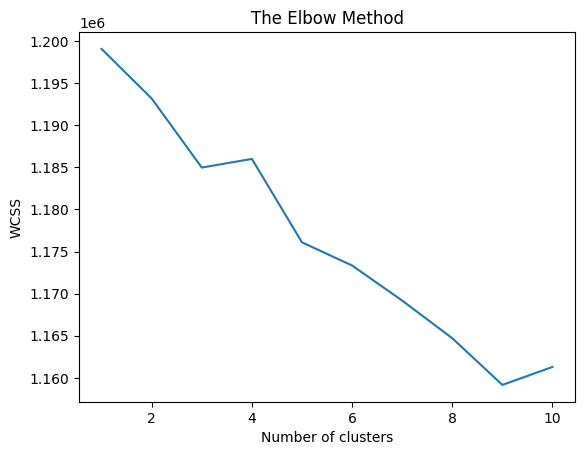

In [29]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(vect_text)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

4, 5, 8 clusters are all possible

##### 2.3.1.2 4 cluster

In [ ]:
# kmeans = KMeans(n_clusters = 4, n_init = 20) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
# kmeans.fit(vect_text)
# # We look at 3 the clusters generated by k-means.
# common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
# for num, centroid in enumerate(common_words):
#     print(f"Topic {num + 1}:")
#     print(', '.join(word for word in centroid))

##### 2.3.1.2 5 cluster

In [ ]:
# kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
# kmeans.fit(X3)
# # We look at 3 the clusters generated by k-means.
# common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
# for num, centroid in enumerate(common_words):
#     print(f"Topic {num + 1}:")
#     print(', '.join(words[word] for word in centroid))

##### 2.3.1.2 8 cluster

In [ ]:
# kmeans = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
# kmeans.fit(X3)
# # We look at 3 the clusters generated by k-means.
# common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
# for num, centroid in enumerate(common_words):
#     print(f"Topic {num + 1}:")
#     print(', '.join(words[word] for word in centroid))

#### 2.3.2 LDA

In [30]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import RegexpTokenizer
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [31]:
stop_words = stopwords.words('english')
# Create a list
tokenizer = RegexpTokenizer(r'\w+')

texts = []
for headline in news_df['headline_cleaned_text']:
    tokens = tokenizer.tokenize(headline.lower())
    tokens = [word for word in tokens if word not in stop_words]
    texts.append(tokens)
    
# Create a dictionary mapping words to their integer IDs
dictionary = corpora.Dictionary(texts)

# Create a document-term matrix (corpus)
corpus = [dictionary.doc2bow(text) for text in texts]

In [32]:
# Specify the number of topics
#by cluster elbow
num_topics = 8

# Build the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

In [33]:
# Print the topics and their top words
for topic_num, topic_words in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
    print(f"Topic {topic_num + 1}:")
    for word, prob in topic_words:
        prob_percentage = prob * 100
        print(f"{word}: {prob_percentage:.2f}%")
    print()

Topic 1:
australian: 4.42%
restrict: 2.10%
live: 1.96%
coronavirus: 1.72%
u: 1.57%
victorian: 1.43%
quarantin: 1.37%
tasmania: 1.37%
new: 1.26%
abc: 0.96%

Topic 2:
victoria: 3.05%
nsw: 3.01%
vaccin: 2.70%
record: 2.40%
govern: 2.28%
new: 1.66%
coronavirus: 1.47%
peopl: 1.24%
qld: 1.18%
ha: 1.15%

Topic 3:
case: 3.41%
queensland: 3.33%
coronavirus: 3.12%
sydney: 2.89%
news: 1.67%
south: 1.67%
coast: 1.36%
brisban: 1.22%
age: 1.13%
adelaid: 1.08%

Topic 4:
australia: 7.34%
coronavirus: 1.84%
warn: 1.60%
world: 1.54%
travel: 1.33%
busi: 1.32%
market: 1.29%
concern: 1.23%
day: 1.14%
open: 1.05%

Topic 5:
polic: 3.23%
man: 2.21%
woman: 2.14%
death: 1.79%
melbourn: 1.74%
lockdown: 1.46%
charg: 1.45%
two: 1.28%
die: 1.25%
murder: 1.21%

Topic 6:
covid: 7.72%
19: 4.28%
china: 1.82%
coronavirus: 1.71%
border: 1.48%
u: 1.46%
say: 1.16%
biden: 0.92%
indigen: 0.92%
former: 0.82%

Topic 7:
test: 1.69%
elect: 1.65%
chang: 1.43%
donald: 1.38%
bushfir: 1.29%
nation: 1.27%
nsw: 1.23%
nt: 1.03%
school:

In [34]:
# Create the PyLDAvis visualisation
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualisation
pyLDAvis.display(vis)

# bertopic try (not the forrmal code)

In [ ]:
from bertopic import BERTopic

In [ ]:
# Extract 
cleaned_text = news_df['cleaned_headline_text'][:100000]

# Pre-calculate Embeddings

In [ ]:
from sentence_transformers import SentenceTransformer

# Pre-calculate embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(cleaned_text, show_progress_bar=True)

In [ ]:
embeddings.shape

# Preventing Stochastic Behavior

In [ ]:
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

# Improving Default Representation

In [ ]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=8, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# Controlling Number of Topics

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words="english", min_df=2, ngram_range=(1, 2))

# Additional Representations

In [ ]:
#import openai
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, OpenAI, PartOfSpeech

# KeyBERT
keybert_model = KeyBERTInspired()

# Part-of-Speech
#pos_model = PartOfSpeech("en_core_web_sm")

# MMR
mmr_model = MaximalMarginalRelevance(diversity=0.3)

# # GPT-3.5
# client = openai.OpenAI(api_key="sk-...")
# prompt = """
# I have a topic that contains the following documents: 
# [DOCUMENTS]
# The topic is described by the following keywords: [KEYWORDS]

# Based on the information above, extract a short but highly descriptive topic label of at most 5 words. Make sure it is in the following format:
# topic: <topic label>
# """
# openai_model = OpenAI(client, model="gpt-3.5-turbo", exponential_backoff=True, chat=True, prompt=prompt)

# All representation models
representation_model = {
    "KeyBERT": keybert_model,
    # "OpenAI": openai_model,  # Uncomment if you will use OpenAI
    #"MMR": mmr_model,
    #"POS": pos_model
}

# train

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(

  # Pipeline models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=10,
  verbose=True
)

# Train model
topics, probs = topic_model.fit_transform(cleaned_text, embeddings)

# Show topics
topic_model.get_topic_info()

In [ ]:
topic_model.get_topic(5, full=True)

In [ ]:
# `topic_distr` contains the distribution of topics in each document
topic_distr, _ = topic_model.approximate_distribution(cleaned_text, window=8, stride=4)

In [ ]:
# Visualize the topic-document distribution for a single document
topic_model.visualize_distribution(topic_distr[0], custom_labels=True)

In [ ]:
# Calculate the topic distributions on a token-level
topic_distr, topic_token_distr = topic_model.approximate_distribution(cleaned_text[0], calculate_tokens=True)

# Visualize the token-level distributions
df = topic_model.visualize_approximate_distribution(cleaned_text[0], topic_token_distr[0])
df

# sentiment analysis

In [37]:
from nltk.corpus import opinion_lexicon
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [38]:
# Get positive and negative lexicons / dictionaries from opinion_lexicon
positive_lexicon = set(opinion_lexicon.positive())
negative_lexicon = set(opinion_lexicon.negative())

In [39]:
def analyze_sentiments(txt, positive_lexicon, negative_lexicon):
    words = txt.split(" ")
    positive_sentiment = 0
    negative_sentiment = 0
    for word in words:
        if word in positive_lexicon:
            positive_sentiment += 1
        elif word in negative_lexicon:
            negative_sentiment += 1

    phi_pos = positive_sentiment / len(words)
    phi_neg = negative_sentiment / len(words)

    try:
        phi_npt = (phi_pos - phi_neg) / (phi_pos + phi_neg)
    except ZeroDivisionError:
        pass
        #error_files[file] = len(cleaned_words)

    sentiment_scores = [phi_pos, phi_neg]
    print(sentiment_scores)

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
sia = SentimentIntensityAnalyzer()
news_df['publish_date'] = pd.to_datetime(news_df['publish_date'], format='%Y%m%d') 

In [43]:
#create polarity scores
news_df['senti_score'] = news_df['headline_cleaned_text'].apply(lambda headline: sia.polarity_scores(headline))

#extract compound scores to a new column
news_df['compound']  = news_df['senti_score'].apply(lambda score_dict: score_dict['compound'])

#create a new column for sentiment labels 
news_df['senti_label'] = news_df['compound'].apply(lambda c: 'positive' if c >=0.05 else 'neutral' if c>-0.05 else 'negative')
news_df['senti_label'].value_counts()

senti_label
neutral     664911
negative    372254
positive    207019
Name: count, dtype: int64

In [44]:
news_df

,publish_date,headline_text,headline_cleaned_text,senti_score,compound,senti_label
0,2003-02-19,aba decides against community broadcasting lic...,aba decid against communiti broadcast licenc,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,2003-02-19,act fire witnesses must be aware of defamation,act fire wit must be awar of defam,"{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'comp...",-0.3400,negative
2,2003-02-19,a g calls for infrastructure protection summit,a g call for infrastructur protect summit,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'comp...",0.3818,positive
3,2003-02-19,air nz staff in aust strike for pay rise,air nz staff in aust strike for pay rise,"{'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'comp...",-0.2263,negative
4,2003-02-19,air nz strike to affect australian travellers,air nz strike to affect australian travel,"{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound...",-0.1280,negative
...,...,...,...,...,...,...
1244179,2021-12-31,two aged care residents die as state records 2...,two age care resid die a state record 2 093,"{'neg': 0.298, 'neu': 0.458, 'pos': 0.244, 'co...",-0.1779,negative
1244180,2021-12-31,victoria records 5;919 new cases and seven deaths,victoria record 5 919 new case and seven death,"{'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'comp...",-0.5994,negative
1244181,2021-12-31,wa delays adopting new close contact definition,wa delay adopt new close contact definit,"{'neg': 0.256, 'neu': 0.556, 'pos': 0.189, 'co...",-0.1531,negative
1244182,2021-12-31,western ringtail possums found badly dehydrate...,western ringtail possum found bad dehydr in he...,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'comp...",-0.5423,negative


In [45]:
date_lst = []
positive_score = []
negative_score = []
neutral_score = []
for index, row in news_df.iterrows():
    if row['publish_date'] not in date_lst:
        date_lst.append(row['publish_date'])
        positive_score.append(0)
        negative_score.append(0)
        neutral_score.append(0)
        
    sentiment = row['senti_label']
    if sentiment == 'positive':
        positive_score[-1] += 1
    elif sentiment == 'negative':
        negative_score[-1] += 1
    else:
        neutral_score[-1] += 1

count_df = pd.DataFrame()
count_df['positive_count'] = positive_score
count_df['negative_count'] = negative_score
count_df['neutral_count'] = neutral_score
count_df['date'] = date_lst
count_df

,positive_count,negative_count,neutral_count,date
0,30,72,96,2003-02-19
1,40,83,127,2003-02-20
2,47,86,117,2003-02-21
3,22,37,67,2003-02-22
4,22,49,65,2003-02-23
...,...,...,...,...
6877,3,12,16,2021-12-27
6878,9,8,17,2021-12-28
6879,5,3,20,2021-12-29
6880,5,6,17,2021-12-30


In [46]:
#count_df.to_csv("E:/year3_sem2/COMP4432/project/sentiment_count.csv")

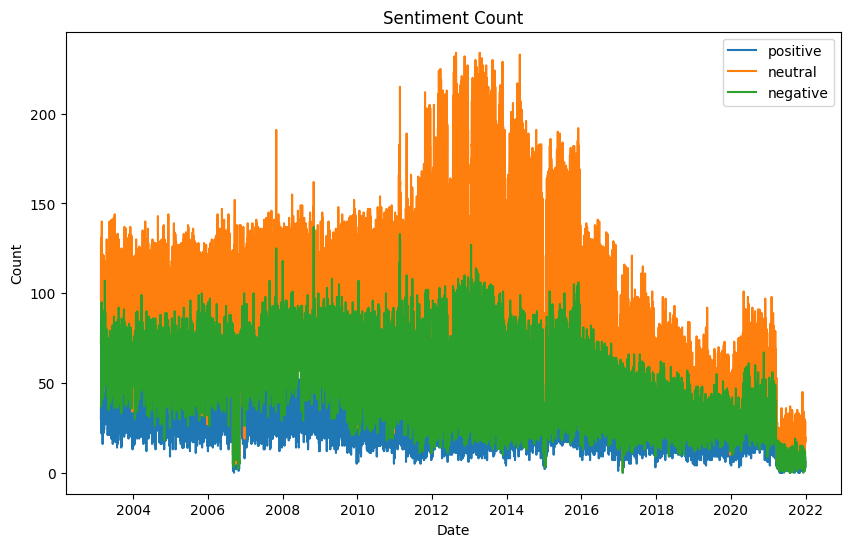

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

count_df['date'] = pd.to_datetime(count_df['date'])


plt.figure(figsize=(10, 6))

plt.plot(count_df['date'], count_df['positive_count'], label='positive')
plt.plot(count_df['date'], count_df['neutral_count'], label='neutral')
plt.plot(count_df['date'], count_df['negative_count'], label='negative')

plt.legend()
plt.title('Sentiment Count')
plt.xlabel('Date')
plt.ylabel('Count')

# 显示图形
plt.show()

In [48]:
count_monthly = count_df.resample('M', on='date').sum()
count_monthly

C:\Users\Administrator\AppData\Local\Temp\ipykernel_39872\1249794382.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  count_monthly = count_df.resample('M', on='date').sum()


,positive_count,negative_count,neutral_count
date,,,
2003-02-28,353,708,1119
2003-03-31,1126,2241,3043
2003-04-30,1107,1880,3114
2003-05-31,1208,1882,3309
2003-06-30,1204,1824,3318
...,...,...,...
2021-08-31,175,200,695
2021-09-30,162,252,637
2021-10-31,159,216,613


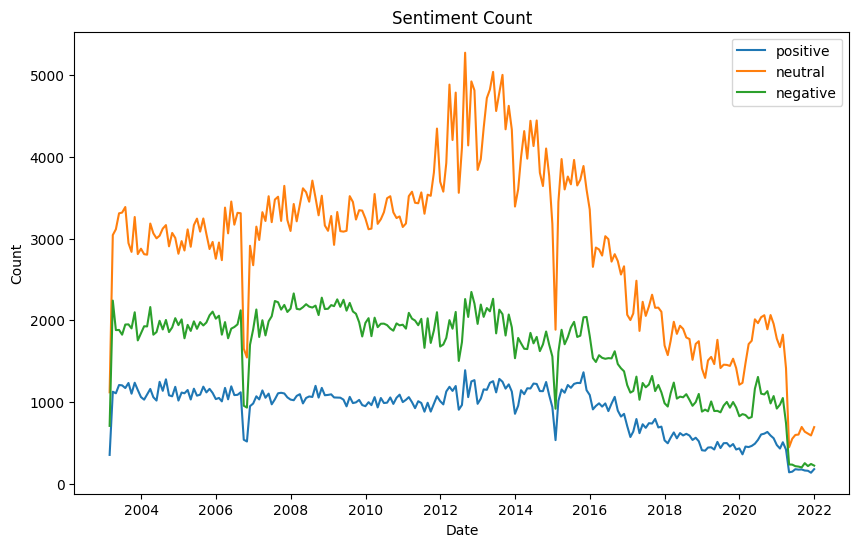

In [49]:
plt.figure(figsize=(10, 6))

plt.plot(count_monthly.index, count_monthly['positive_count'], label='positive')
plt.plot(count_monthly.index, count_monthly['neutral_count'], label='neutral')
plt.plot(count_monthly.index, count_monthly['negative_count'], label='negative')

plt.legend()
plt.title('Sentiment Count')
plt.xlabel('Date')
plt.ylabel('Count')

# 显示图形
plt.show()

In [50]:
grouped_df = news_df.groupby('publish_date')['compound'].sum().reset_index()
grouped_df

,publish_date,compound
0,2003-02-19,-19.0758
1,2003-02-20,-23.2749
2,2003-02-21,-19.7626
3,2003-02-22,-9.0097
4,2003-02-23,-15.7253
...,...,...
6877,2021-12-27,-3.0582
6878,2021-12-28,-0.8471
6879,2021-12-29,1.2192
6880,2021-12-30,-0.5951


In [51]:
grouped_df['senti_label'] = grouped_df['compound'].apply(lambda c: 1 if c >=0 else -1 if c<0 else 0)
grouped_df.set_index('publish_date', inplace=True)
grouped_df.index.name = 'date'
grouped_df

,compound,senti_label
date,,
2003-02-19,-19.0758,-1
2003-02-20,-23.2749,-1
2003-02-21,-19.7626,-1
2003-02-22,-9.0097,-1
2003-02-23,-15.7253,-1
...,...,...
2021-12-27,-3.0582,-1
2021-12-28,-0.8471,-1
2021-12-29,1.2192,1


In [52]:
import yfinance as yf

# S&P/ASX 200
AXJO_ticker_symbol = '^AXJO'
# SP500
SPX_ticker_symbol = '^SPX'
# NASDAQ
IXIC_ticker_symbol = '^IXIC'
start_date = '2003-01-01' 
end_date = '2021-12-31'  


AXJO_stock_data = yf.download(AXJO_ticker_symbol, start=start_date, end=end_date)
SPX_stock_data = yf.download(SPX_ticker_symbol, start=start_date, end=end_date)
IXIC_stock_data = yf.download(IXIC_ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed

C:\Users\Administrator\anaconda3\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



[*********************100%%**********************]  1 of 1 completed

C:\Users\Administrator\anaconda3\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



[*********************100%%**********************]  1 of 1 completed


C:\Users\Administrator\anaconda3\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [53]:
AXJO_stock_data['Previous 1 Adj Close'] = AXJO_stock_data['Adj Close'].shift(1)
AXJO_stock_data['Previous 3 Adj Close'] = AXJO_stock_data['Adj Close'].shift(3)
AXJO_stock_data['Previous 5 Adj Close'] = AXJO_stock_data['Adj Close'].shift(5)
AXJO_stock_data['Previous 30 Adj Close'] = AXJO_stock_data['Adj Close'].shift(30)
AXJO_stock_data['AXJO window 1'] = np.where(AXJO_stock_data['Adj Close'] >= AXJO_stock_data['Previous 1 Adj Close'] , 1, -1)
AXJO_stock_data['AXJO window 3'] = np.where(AXJO_stock_data['Adj Close'] >= AXJO_stock_data['Previous 3 Adj Close'] , 1, -1)
AXJO_stock_data['AXJO window 5'] = np.where(AXJO_stock_data['Adj Close'] >= AXJO_stock_data['Previous 5 Adj Close'] , 1, -1)
AXJO_stock_data['AXJO window 30'] = np.where(AXJO_stock_data['Adj Close'] >= AXJO_stock_data['Previous 30 Adj Close'] , 1, -1)
AXJO_stock_data

,Open,High,Low,Close,Adj Close,Volume,Previous 1 Adj Close,Previous 3 Adj Close,Previous 5 Adj Close,Previous 30 Adj Close,AXJO window 1,AXJO window 3,AXJO window 5,AXJO window 30
Date,,,,,,,,,,,,,,
2003-01-02,3007.100098,3028.899902,2999.899902,3027.600098,3027.600098,0,NaN,NaN,NaN,NaN,-1,-1,-1,-1
2003-01-03,3027.600098,3055.899902,3027.600098,3055.500000,3055.500000,0,3027.600098,NaN,NaN,NaN,1,-1,-1,-1
2003-01-06,3051.800049,3084.699951,3051.800049,3075.399902,3075.399902,0,3055.500000,NaN,NaN,NaN,1,-1,-1,-1
2003-01-07,3075.399902,3094.100098,3070.399902,3074.500000,3074.500000,0,3075.399902,3027.600098,NaN,NaN,-1,1,-1,-1
2003-01-08,3074.500000,3086.899902,3069.399902,3074.699951,3074.699951,0,3074.500000,3055.500000,NaN,NaN,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,7361.899902,7374.500000,7333.000000,7364.799805,7364.799805,539800,7355.000000,7304.000000,7327.100098,7423.899902,1,1,1,-1
2021-12-23,7365.100098,7404.200195,7363.600098,7387.600098,7387.600098,390000,7364.799805,7292.200195,7295.700195,7381.899902,1,1,1,1
2021-12-24,7387.600098,7435.899902,7387.600098,7420.299805,7420.299805,230000,7387.600098,7355.000000,7304.000000,7443.000000,1,1,1,-1


In [54]:
merged_df = pd.merge(grouped_df, AXJO_stock_data[['AXJO window 1', 'AXJO window 3', 'AXJO window 5', 'AXJO window 30']], left_index=True, right_index=True, how='inner')
merged_df

,compound,senti_label,AXJO window 1,AXJO window 3,AXJO window 5,AXJO window 30
2003-02-19,-19.0758,-1,1,1,-1,-1
2003-02-20,-23.2749,-1,-1,-1,-1,-1
2003-02-21,-19.7626,-1,1,-1,1,-1
2003-02-24,-18.9650,-1,1,-1,1,-1
2003-02-25,-11.1212,-1,-1,-1,-1,-1
...,...,...,...,...,...,...
2021-12-22,1.1794,1,1,1,1,-1
2021-12-23,-2.3622,-1,1,1,1,1
2021-12-24,1.0289,1,1,1,1,-1
2021-12-29,1.2192,1,1,1,1,1


In [55]:
accuracy_dict = {}

In [56]:
count_same_1 = len(merged_df[merged_df['senti_label'] == merged_df['AXJO window 1']])
count_same_3 = len(merged_df[merged_df['senti_label'] == merged_df['AXJO window 3']])
count_same_5 = len(merged_df[merged_df['senti_label'] == merged_df['AXJO window 5']])
count_same_30 = len(merged_df[merged_df['senti_label'] == merged_df['AXJO window 30']])

percentage_same_1 = (count_same_1 / len(merged_df))
percentage_same_3 = (count_same_3 / len(merged_df))
percentage_same_5 = (count_same_5 / len(merged_df))
percentage_same_30 = (count_same_30 / len(merged_df))
accuracy_dict = {"one-day lag for S&P/ASX 200": percentage_same_1, "three-day lag for S&P/ASX 200": percentage_same_3, "five-day lag for S&P/ASX 200": percentage_same_5, "one-month lag for S&P/ASX 200": percentage_same_30}
print(percentage_same_1, percentage_same_3, percentage_same_5, percentage_same_30)

0.4666106677866443 0.4435111297774045 0.43490130197396054 0.36497270054598907


In [57]:
SPX_stock_data['Previous 1 Adj Close'] = SPX_stock_data['Adj Close'].shift(1)
SPX_stock_data['Previous 3 Adj Close'] = SPX_stock_data['Adj Close'].shift(3)
SPX_stock_data['Previous 5 Adj Close'] = SPX_stock_data['Adj Close'].shift(5)
SPX_stock_data['Previous 30 Adj Close'] = SPX_stock_data['Adj Close'].shift(30)
SPX_stock_data['SPX window 1'] = np.where(SPX_stock_data['Adj Close'] >= SPX_stock_data['Previous 1 Adj Close'] , 1, -1)
SPX_stock_data['SPX window 3'] = np.where(SPX_stock_data['Adj Close'] >= SPX_stock_data['Previous 3 Adj Close'] , 1, -1)
SPX_stock_data['SPX window 5'] = np.where(SPX_stock_data['Adj Close'] >= SPX_stock_data['Previous 5 Adj Close'] , 1, -1)
SPX_stock_data['SPX window 30'] = np.where(SPX_stock_data['Adj Close'] >= SPX_stock_data['Previous 30 Adj Close'] , 1, -1)
SPX_stock_data

,Open,High,Low,Close,Adj Close,Volume,Previous 1 Adj Close,Previous 3 Adj Close,Previous 5 Adj Close,Previous 30 Adj Close,SPX window 1,SPX window 3,SPX window 5,SPX window 30
Date,,,,,,,,,,,,,,
2003-01-02,879.820007,909.030029,879.820007,909.030029,909.030029,1229200000,NaN,NaN,NaN,NaN,-1,-1,-1,-1
2003-01-03,909.030029,911.250000,903.070007,908.590027,908.590027,1130800000,909.030029,NaN,NaN,NaN,-1,-1,-1,-1
2003-01-06,908.590027,931.770020,908.590027,929.010010,929.010010,1435900000,908.590027,NaN,NaN,NaN,1,-1,-1,-1
2003-01-07,929.010010,930.809998,919.929993,922.929993,922.929993,1545200000,929.010010,909.030029,NaN,NaN,-1,1,-1,-1
2003-01-08,922.929993,922.929993,908.320007,909.929993,909.929993,1467600000,922.929993,908.590027,NaN,NaN,-1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,4703.959961,4740.740234,4703.959961,4725.790039,4725.790039,2913040000,4696.560059,4568.020020,4668.669922,4646.709961,1,1,1,1
2021-12-27,4733.990234,4791.490234,4733.990234,4791.189941,4791.189941,2770290000,4725.790039,4649.229980,4620.640137,4649.270020,1,1,1,1
2021-12-28,4795.490234,4807.020020,4780.040039,4786.350098,4786.350098,2707920000,4791.189941,4696.560059,4568.020020,4682.850098,-1,1,1,1


In [58]:
merged_df = pd.merge(merged_df, SPX_stock_data[['SPX window 1', 'SPX window 3', 'SPX window 5', 'SPX window 30']], left_index=True, right_index=True, how='inner')
merged_df

,compound,senti_label,AXJO window 1,AXJO window 3,AXJO window 5,AXJO window 30,SPX window 1,SPX window 3,SPX window 5,SPX window 30
2003-02-19,-19.0758,-1,1,1,-1,-1,-1,1,1,-1
2003-02-20,-23.2749,-1,-1,-1,-1,-1,-1,1,1,-1
2003-02-21,-19.7626,-1,1,-1,1,-1,1,-1,1,-1
2003-02-24,-18.9650,-1,1,-1,1,-1,-1,-1,-1,-1
2003-02-25,-11.1212,-1,-1,-1,-1,-1,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...
2021-12-21,-0.6150,-1,1,1,-1,-1,1,-1,1,-1
2021-12-22,1.1794,1,1,1,1,-1,1,1,-1,1
2021-12-23,-2.3622,-1,1,1,1,1,1,1,1,1
2021-12-29,1.2192,1,1,1,1,1,1,1,1,1


In [59]:
count_same_1 = len(merged_df[merged_df['senti_label'] == merged_df['SPX window 1']])
count_same_3 = len(merged_df[merged_df['senti_label'] == merged_df['SPX window 3']])
count_same_5 = len(merged_df[merged_df['senti_label'] == merged_df['SPX window 5']])
count_same_30 = len(merged_df[merged_df['senti_label'] == merged_df['SPX window 30']])

percentage_same_1 = (count_same_1 / len(merged_df))
percentage_same_3 = (count_same_3 / len(merged_df))
percentage_same_5 = (count_same_5 / len(merged_df))
percentage_same_30 = (count_same_30 / len(merged_df))
accuracy_dict["one-day lag for SP500"] = percentage_same_1
accuracy_dict["three-day lag for SP500"] = percentage_same_3
accuracy_dict["five-day lag for SP500"] = percentage_same_5
accuracy_dict["one-month lag for SP500"] = percentage_same_30

print(percentage_same_1, percentage_same_3, percentage_same_5, percentage_same_30)

0.45468245425188375 0.4219590958019376 0.4129171151776103 0.33627556512378903


In [60]:
IXIC_stock_data['Previous 1 Adj Close'] = IXIC_stock_data['Adj Close'].shift(1)
IXIC_stock_data['Previous 3 Adj Close'] = IXIC_stock_data['Adj Close'].shift(3)
IXIC_stock_data['Previous 5 Adj Close'] = IXIC_stock_data['Adj Close'].shift(5)
IXIC_stock_data['Previous 30 Adj Close'] = IXIC_stock_data['Adj Close'].shift(30)
IXIC_stock_data['IXIC window 1'] = np.where(IXIC_stock_data['Adj Close'] >= IXIC_stock_data['Previous 1 Adj Close'] , 1, -1)
IXIC_stock_data['IXIC window 3'] = np.where(IXIC_stock_data['Adj Close'] >= IXIC_stock_data['Previous 3 Adj Close'] , 1, -1)
IXIC_stock_data['IXIC window 5'] = np.where(IXIC_stock_data['Adj Close'] >= IXIC_stock_data['Previous 5 Adj Close'] , 1, -1)
IXIC_stock_data['IXIC window 30'] = np.where(IXIC_stock_data['Adj Close'] >= IXIC_stock_data['Previous 30 Adj Close'] , 1, -1)
IXIC_stock_data

,Open,High,Low,Close,Adj Close,Volume,Previous 1 Adj Close,Previous 3 Adj Close,Previous 5 Adj Close,Previous 30 Adj Close,IXIC window 1,IXIC window 3,IXIC window 5,IXIC window 30
Date,,,,,,,,,,,,,,
2003-01-02,1346.930054,1384.910034,1336.979980,1384.849976,1384.849976,1287540000,NaN,NaN,NaN,NaN,-1,-1,-1,-1
2003-01-03,1382.359985,1389.439941,1374.609985,1387.079956,1387.079956,1149590000,1384.849976,NaN,NaN,NaN,1,-1,-1,-1
2003-01-06,1390.189941,1428.650024,1390.089966,1421.319946,1421.319946,1567690000,1387.079956,NaN,NaN,NaN,1,-1,-1,-1
2003-01-07,1424.260010,1442.260010,1416.229980,1431.569946,1431.569946,1755760000,1421.319946,1384.849976,NaN,NaN,1,1,-1,-1
2003-01-08,1423.290039,1424.119995,1399.060059,1401.069946,1401.069946,1457010000,1431.569946,1387.079956,NaN,NaN,-1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,15544.790039,15697.980469,15528.910156,15653.370117,15653.370117,3935010000,15521.889648,14980.940430,15180.429688,15622.709961,1,1,1,1
2021-12-27,15696.830078,15871.400391,15696.830078,15871.259766,15871.259766,3743920000,15653.370117,15341.089844,15169.679688,15704.280273,1,1,1,1
2021-12-28,15895.200195,15901.469727,15757.070312,15781.719727,15781.719727,3648500000,15871.259766,15521.889648,14980.940430,15860.959961,-1,1,1,-1


In [61]:
merged_df = pd.merge(merged_df, IXIC_stock_data[['IXIC window 1', 'IXIC window 3', 'IXIC window 5', 'IXIC window 30']], left_index=True, right_index=True, how='inner')
merged_df

,compound,senti_label,AXJO window 1,AXJO window 3,AXJO window 5,AXJO window 30,SPX window 1,SPX window 3,SPX window 5,SPX window 30,IXIC window 1,IXIC window 3,IXIC window 5,IXIC window 30
2003-02-19,-19.0758,-1,1,1,-1,-1,-1,1,1,-1,-1,1,1,-1
2003-02-20,-23.2749,-1,-1,-1,-1,-1,-1,1,1,-1,-1,1,1,-1
2003-02-21,-19.7626,-1,1,-1,1,-1,1,-1,1,-1,1,1,1,-1
2003-02-24,-18.9650,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1
2003-02-25,-11.1212,-1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,-0.6150,-1,1,1,-1,-1,1,-1,1,-1,1,1,1,-1
2021-12-22,1.1794,1,1,1,1,-1,1,1,-1,1,1,1,-1,-1
2021-12-23,-2.3622,-1,1,1,1,1,1,1,1,1,1,1,1,1
2021-12-29,1.2192,1,1,1,1,1,1,1,1,1,-1,1,1,-1


In [62]:
count_same_1 = len(merged_df[merged_df['senti_label'] == merged_df['IXIC window 1']])
count_same_3 = len(merged_df[merged_df['senti_label'] == merged_df['IXIC window 3']])
count_same_5 = len(merged_df[merged_df['senti_label'] == merged_df['IXIC window 5']])
count_same_30 = len(merged_df[merged_df['senti_label'] == merged_df['IXIC window 30']])

percentage_same_1 = (count_same_1 / len(merged_df))
percentage_same_3 = (count_same_3 / len(merged_df))
percentage_same_5 = (count_same_5 / len(merged_df))
percentage_same_30 = (count_same_30 / len(merged_df))
accuracy_dict["one-day lag for NASDAQ Composite"] = percentage_same_1
accuracy_dict["three-day lag for NASDAQ Composite"] = percentage_same_3
accuracy_dict["five-day lag for NASDAQ Composite"] = percentage_same_5
accuracy_dict["one-month lag for NASDAQ Composite"] = percentage_same_30
print(percentage_same_1, percentage_same_3, percentage_same_5, percentage_same_30)

0.4486544671689989 0.4243272335844995 0.4139935414424112 0.33541442411194833


In [63]:
for key, value in accuracy_dict.items():
    print("%-40s" % key, value)

one-day lag for S&P/ASX 200              0.4666106677866443
three-day lag for S&P/ASX 200            0.4435111297774045
five-day lag for S&P/ASX 200             0.43490130197396054
one-month lag for S&P/ASX 200            0.36497270054598907
one-day lag for SP500                    0.45468245425188375
three-day lag for SP500                  0.4219590958019376
five-day lag for SP500                   0.4129171151776103
one-month lag for SP500                  0.33627556512378903
one-day lag for NASDAQ Composite         0.4486544671689989
three-day lag for NASDAQ Composite       0.4243272335844995
five-day lag for NASDAQ Composite        0.4139935414424112
one-month lag for NASDAQ Composite       0.33541442411194833


# Machine Learning Method

In [64]:
count_df.set_index('date', inplace=True)

row_sums = count_df.sum(axis=1)

count_df = count_df.apply(lambda row: row / row_sums[row.name], axis=1)
count_df

,positive_count,negative_count,neutral_count
date,,,
2003-02-19,0.151515,0.363636,0.484848
2003-02-20,0.160000,0.332000,0.508000
2003-02-21,0.188000,0.344000,0.468000
2003-02-22,0.174603,0.293651,0.531746
2003-02-23,0.161765,0.360294,0.477941
...,...,...,...
2021-12-27,0.096774,0.387097,0.516129
2021-12-28,0.264706,0.235294,0.500000
2021-12-29,0.178571,0.107143,0.714286


In [65]:
count_df['compound'] = grouped_df['compound']
count_df

,positive_count,negative_count,neutral_count,compound
date,,,,
2003-02-19,0.151515,0.363636,0.484848,-19.0758
2003-02-20,0.160000,0.332000,0.508000,-23.2749
2003-02-21,0.188000,0.344000,0.468000,-19.7626
2003-02-22,0.174603,0.293651,0.531746,-9.0097
2003-02-23,0.161765,0.360294,0.477941,-15.7253
...,...,...,...,...
2021-12-27,0.096774,0.387097,0.516129,-3.0582
2021-12-28,0.264706,0.235294,0.500000,-0.8471
2021-12-29,0.178571,0.107143,0.714286,1.2192


In [66]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [67]:
merged_df[:338]

,compound,senti_label,AXJO window 1,AXJO window 3,AXJO window 5,AXJO window 30,SPX window 1,SPX window 3,SPX window 5,SPX window 30,IXIC window 1,IXIC window 3,IXIC window 5,IXIC window 30
2003-02-19,-19.0758,-1,1,1,-1,-1,-1,1,1,-1,-1,1,1,-1
2003-02-20,-23.2749,-1,-1,-1,-1,-1,-1,1,1,-1,-1,1,1,-1
2003-02-21,-19.7626,-1,1,-1,1,-1,1,-1,1,-1,1,1,1,-1
2003-02-24,-18.9650,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1
2003-02-25,-11.1212,-1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-06-24,-17.3376,-1,-1,-1,1,1,-1,1,1,1,-1,1,1,1
2004-06-25,-17.9369,-1,-1,-1,1,1,-1,1,-1,1,1,1,1,1
2004-06-28,-8.8775,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,1
2004-06-29,-21.4052,-1,-1,-1,-1,1,1,-1,1,1,1,1,1,1


In [68]:
for index in ['IXIC window 1', 'IXIC window 3', 'IXIC window 5', 'IXIC window 30', 'SPX window 1', 'SPX window 3', 'SPX window 5', 'SPX window 30', 'AXJO window 1', 'AXJO window 3', 'AXJO window 5', 'AXJO window 30']:
    target = np.where(merged_df[index] == 1 , 1, 0)
    X_train, X_eval, y_train, y_eval = train_test_split(count_df[:338], target[:338],test_size=0.2,random_state=1999)
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_eval)
    
    print("%-40s" %index , accuracy_score(y_eval, y_pred))

C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or

IXIC window 1                            0.5294117647058824
IXIC window 3                            0.5
IXIC window 5                            0.6029411764705882


C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or

IXIC window 30                           0.75
SPX window 1                             0.4264705882352941
SPX window 3                             0.5294117647058824


C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or

SPX window 5                             0.5294117647058824
SPX window 30                            0.6323529411764706
AXJO window 1                            0.5147058823529411


C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or

AXJO window 3                            0.6470588235294118
AXJO window 5                            0.6470588235294118
AXJO window 30                           0.7352941176470589


In [69]:
for index in ['IXIC window 1', 'IXIC window 3', 'IXIC window 5', 'IXIC window 30', 'SPX window 1', 'SPX window 3', 'SPX window 5', 'SPX window 30', 'AXJO window 1', 'AXJO window 3', 'AXJO window 5', 'AXJO window 30']:
    target = np.where(merged_df[index] == 1 , 1, 0)
    X_train, X_eval, y_train, y_eval = train_test_split(count_df[:338], target[:338],test_size=0.2,random_state=1999)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_eval)
    
    print("%-40s" %index , accuracy_score(y_eval, y_pred))

IXIC window 1                            0.4852941176470588
IXIC window 3                            0.5441176470588235
IXIC window 5                            0.6323529411764706
IXIC window 30                           0.7352941176470589
SPX window 1                             0.5294117647058824
SPX window 3                             0.6176470588235294
SPX window 5                             0.5882352941176471
SPX window 30                            0.7205882352941176
AXJO window 1                            0.5882352941176471
AXJO window 3                            0.6176470588235294
AXJO window 5                            0.6323529411764706
AXJO window 30                           0.8088235294117647


C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `

In [70]:
for index in ['IXIC window 1', 'IXIC window 3', 'IXIC window 5', 'IXIC window 30', 'SPX window 1', 'SPX window 3', 'SPX window 5', 'SPX window 30', 'AXJO window 1', 'AXJO window 3', 'AXJO window 5', 'AXJO window 30']:
    target = np.where(merged_df[index] == 1 , 1, 0)
    X_train, X_eval, y_train, y_eval = train_test_split(count_df[:338], target[:338],test_size=0.2,random_state=1999)
    et = ExtraTreesClassifier()
    et.fit(X_train, y_train)
    y_pred = et.predict(X_eval)
    
    print("%-40s" %index , accuracy_score(y_eval, y_pred))

C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `

IXIC window 1                            0.4411764705882353
IXIC window 3                            0.5147058823529411


C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `

IXIC window 5                            0.5735294117647058
IXIC window 30                           0.7205882352941176


C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `

SPX window 1                             0.45588235294117646
SPX window 3                             0.45588235294117646


C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `

SPX window 5                             0.47058823529411764
SPX window 30                            0.6911764705882353


C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `

AXJO window 1                            0.5588235294117647
AXJO window 3                            0.6029411764705882
AXJO window 5                            0.5882352941176471
AXJO window 30                           0.75


C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `

# Add Topics

In [71]:
import numpy as np
best_topic = np.load('topics.npy')
sample_df = news_df[:100000]
sample_df['topic'] = best_topic
sample_df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_39872\1448443118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['topic'] = best_topic


,publish_date,headline_text,headline_cleaned_text,senti_score,compound,senti_label,topic
0,2003-02-19,aba decides against community broadcasting lic...,aba decid against communiti broadcast licenc,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,4
1,2003-02-19,act fire witnesses must be aware of defamation,act fire wit must be awar of defam,"{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'comp...",-0.3400,negative,6
2,2003-02-19,a g calls for infrastructure protection summit,a g call for infrastructur protect summit,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'comp...",0.3818,positive,2
3,2003-02-19,air nz staff in aust strike for pay rise,air nz staff in aust strike for pay rise,"{'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'comp...",-0.2263,negative,4
4,2003-02-19,air nz strike to affect australian travellers,air nz strike to affect australian travel,"{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound...",-0.1280,negative,2
...,...,...,...,...,...,...,...
99995,2004-06-30,call for rethink on foreign tourism investment,call for rethink on foreign tourism invest,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,4
99996,2004-06-30,call for timber security boost,call for timber secur boost,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...",0.4019,positive,2
99997,2004-06-30,call in powers bill likely to fail,call in power bill like to fail,"{'neg': 0.318, 'neu': 0.455, 'pos': 0.227, 'co...",-0.2500,negative,2
99998,2004-06-30,cambodian parties seal coalition deal,cambodian parti seal coalit deal,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,3


In [72]:
date_lst = []
topics = []
for i in range(8):
    topics.append([])
    
for index, row in sample_df.iterrows():
    if row['publish_date'] not in date_lst:
        date_lst.append(row['publish_date'])
        for i in range(8):
             topics[i].append(0)
        
    topic = row['topic']
    topics[topic-1][-1] += 1

count_df2 = pd.DataFrame()
count_df2['date'] = date_lst

for i in range(8):
    count_df2[f"count_topic_{str(i+1)}"] = topics[i]
count_df2 

,date,count_topic_1,count_topic_2,count_topic_3,count_topic_4,count_topic_5,count_topic_6,count_topic_7,count_topic_8
0,2003-02-19,32,38,26,20,19,21,22,20
1,2003-02-20,34,35,37,25,26,34,21,38
2,2003-02-21,35,51,28,30,33,23,11,39
3,2003-02-22,29,10,17,8,11,18,15,18
4,2003-02-23,29,12,16,9,10,22,13,25
...,...,...,...,...,...,...,...,...,...
492,2004-06-26,32,16,14,8,12,6,23,23
493,2004-06-27,28,17,12,10,7,12,22,22
494,2004-06-28,20,34,20,36,19,22,23,31
495,2004-06-29,33,27,27,31,29,21,17,48


In [73]:
count_df2.set_index('date', inplace=True)

row_sums = count_df2.sum(axis=1)

count_df2 = count_df2.apply(lambda row: row / row_sums[row.name], axis=1)
count_df2

,count_topic_1,count_topic_2,count_topic_3,count_topic_4,count_topic_5,count_topic_6,count_topic_7,count_topic_8
date,,,,,,,,
2003-02-19,0.161616,0.191919,0.131313,0.101010,0.095960,0.106061,0.111111,0.101010
2003-02-20,0.136000,0.140000,0.148000,0.100000,0.104000,0.136000,0.084000,0.152000
2003-02-21,0.140000,0.204000,0.112000,0.120000,0.132000,0.092000,0.044000,0.156000
2003-02-22,0.230159,0.079365,0.134921,0.063492,0.087302,0.142857,0.119048,0.142857
2003-02-23,0.213235,0.088235,0.117647,0.066176,0.073529,0.161765,0.095588,0.183824
...,...,...,...,...,...,...,...,...
2004-06-26,0.238806,0.119403,0.104478,0.059701,0.089552,0.044776,0.171642,0.171642
2004-06-27,0.215385,0.130769,0.092308,0.076923,0.053846,0.092308,0.169231,0.169231
2004-06-28,0.097561,0.165854,0.097561,0.175610,0.092683,0.107317,0.112195,0.151220


In [74]:
for index in ['IXIC window 1', 'IXIC window 3', 'IXIC window 5', 'IXIC window 30', 'SPX window 1', 'SPX window 3', 'SPX window 5', 'SPX window 30', 'AXJO window 1', 'AXJO window 3', 'AXJO window 5', 'AXJO window 30']:
    target = np.where(merged_df[index] == 1 , 1, 0)
    X_train, X_eval, y_train, y_eval = train_test_split(count_df2[:338], target[:338],test_size=0.2,random_state=1999)
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_eval)
    
    print("%-40s" %index , accuracy_score(y_eval, y_pred))

C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or

IXIC window 1                            0.4852941176470588
IXIC window 3                            0.5588235294117647


C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or

IXIC window 5                            0.47058823529411764
IXIC window 30                           0.7058823529411765
SPX window 1                             0.47058823529411764


C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or

SPX window 3                             0.47058823529411764
SPX window 5                             0.6176470588235294
SPX window 30                            0.6764705882352942


C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or

AXJO window 1                            0.4411764705882353
AXJO window 3                            0.6029411764705882
AXJO window 5                            0.5441176470588235
AXJO window 30                           0.7647058823529411


C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or

In [75]:
for index in ['IXIC window 1', 'IXIC window 3', 'IXIC window 5', 'IXIC window 30', 'SPX window 1', 'SPX window 3', 'SPX window 5', 'SPX window 30', 'AXJO window 1', 'AXJO window 3', 'AXJO window 5', 'AXJO window 30']:
    target = np.where(merged_df[index] == 1 , 1, 0)
    X_train, X_eval, y_train, y_eval = train_test_split(count_df2[:338], target[:338],test_size=0.2,random_state=1999)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_eval)
    
    print("%-40s" %index , accuracy_score(y_eval, y_pred))

IXIC window 1                            0.4852941176470588
IXIC window 3                            0.6029411764705882
IXIC window 5                            0.6323529411764706
IXIC window 30                           0.7352941176470589
SPX window 1                             0.5294117647058824
SPX window 3                             0.6176470588235294
SPX window 5                             0.5882352941176471
SPX window 30                            0.7205882352941176
AXJO window 1                            0.5882352941176471
AXJO window 3                            0.6176470588235294
AXJO window 5                            0.6323529411764706
AXJO window 30                           0.8088235294117647


C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `

In [76]:
# for index, row in news_df.iterrows():
#     txt = row["headline_cleaned_text"]
#     print(analyze_sentiments(txt, positive_lexicon, negative_lexicon))

In [77]:
merge_train_df = pd.merge(count_df, count_df2, left_index=True, right_index=True)

merge_train_df

,positive_count,negative_count,neutral_count,compound,count_topic_1,count_topic_2,count_topic_3,count_topic_4,count_topic_5,count_topic_6,count_topic_7,count_topic_8
date,,,,,,,,,,,,
2003-02-19,0.151515,0.363636,0.484848,-19.0758,0.161616,0.191919,0.131313,0.101010,0.095960,0.106061,0.111111,0.101010
2003-02-20,0.160000,0.332000,0.508000,-23.2749,0.136000,0.140000,0.148000,0.100000,0.104000,0.136000,0.084000,0.152000
2003-02-21,0.188000,0.344000,0.468000,-19.7626,0.140000,0.204000,0.112000,0.120000,0.132000,0.092000,0.044000,0.156000
2003-02-22,0.174603,0.293651,0.531746,-9.0097,0.230159,0.079365,0.134921,0.063492,0.087302,0.142857,0.119048,0.142857
2003-02-23,0.161765,0.360294,0.477941,-15.7253,0.213235,0.088235,0.117647,0.066176,0.073529,0.161765,0.095588,0.183824
...,...,...,...,...,...,...,...,...,...,...,...,...
2004-06-26,0.171642,0.261194,0.567164,-7.8393,0.238806,0.119403,0.104478,0.059701,0.089552,0.044776,0.171642,0.171642
2004-06-27,0.215385,0.323077,0.461538,-6.4704,0.215385,0.130769,0.092308,0.076923,0.053846,0.092308,0.169231,0.169231
2004-06-28,0.224390,0.292683,0.482927,-8.8775,0.097561,0.165854,0.097561,0.175610,0.092683,0.107317,0.112195,0.151220


In [78]:
for index in ['IXIC window 1', 'IXIC window 3', 'IXIC window 5', 'IXIC window 30', 'SPX window 1', 'SPX window 3', 'SPX window 5', 'SPX window 30', 'AXJO window 1', 'AXJO window 3', 'AXJO window 5', 'AXJO window 30']:
    target = np.where(merged_df[index] == 1 , 1, 0)
    X_train, X_eval, y_train, y_eval = train_test_split(merge_train_df[:338], target[:338],test_size=0.2,random_state=1999)
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_eval)
    
    print("%-40s" %index , accuracy_score(y_eval, y_pred))

C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or

IXIC window 1                            0.5


C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or

IXIC window 3                            0.5
IXIC window 5                            0.5147058823529411
IXIC window 30                           0.7058823529411765


C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or

SPX window 1                             0.45588235294117646
SPX window 3                             0.5588235294117647
SPX window 5                             0.5735294117647058
SPX window 30                            0.6470588235294118


C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or

AXJO window 1                            0.5735294117647058
AXJO window 3                            0.5441176470588235


C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or

AXJO window 5                            0.5735294117647058
AXJO window 30                           0.7941176470588235


C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:335: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\data.py:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(dtype) or

In [79]:
for index in ['IXIC window 1', 'IXIC window 3', 'IXIC window 5', 'IXIC window 30', 'SPX window 1', 'SPX window 3', 'SPX window 5', 'SPX window 30', 'AXJO window 1', 'AXJO window 3', 'AXJO window 5', 'AXJO window 30']:
    target = np.where(merged_df[index] == 1 , 1, 0)
    X_train, X_eval, y_train, y_eval = train_test_split(merge_train_df[:338], target[:338],test_size=0.2,random_state=1999)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_eval)
    
    print("%-40s" %index , accuracy_score(y_eval, y_pred))

C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `

IXIC window 1                            0.4852941176470588
IXIC window 3                            0.5441176470588235
IXIC window 5                            0.6323529411764706
IXIC window 30                           0.7352941176470589
SPX window 1                             0.5294117647058824
SPX window 3                             0.6176470588235294
SPX window 5                             0.5882352941176471
SPX window 30                            0.7205882352941176
AXJO window 1                            0.5735294117647058
AXJO window 3                            0.6176470588235294
AXJO window 5                            0.6323529411764706
AXJO window 30                           0.8088235294117647


C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `

In [80]:
news_df['publish_date'] = pd.to_datetime(news_df['publish_date'])
text_df = news_df.groupby(news_df['publish_date'].dt.date)['headline_cleaned_text'].apply(' '.join)

In [81]:
text_df = text_df.reset_index()
text_df

,publish_date,headline_cleaned_text
0,2003-02-19,aba decid against communiti broadcast licenc a...
1,2003-02-20,15 dead in rebel bomb raid philippin armi abat...
2,2003-02-21,accc too timid in petrol price investig action...
3,2003-02-22,86 confirm dead after u nightclub fire act tou...
4,2003-02-23,accus peopl smuggler to face darwin court act ...
...,...,...
6877,2021-12-27,2021 end a scienc centr year with covid 19 ant...
6878,2021-12-28,8.7 million afghan face emerg level of airlin ...
6879,2021-12-29,black jack sail in to hobart black jack win th...
6880,2021-12-30,40 million dollar rottnest redevelop get the g...


In [85]:
from sentence_transformers import SentenceTransformer

# Pre-calculate embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(text_df['headline_cleaned_text'][:100000], show_progress_bar=True)

C:\Users\Administrator\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\Administrator\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\Administrator\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.com

Batches:   0%|          | 0/216 [00:00<?, ?it/s]

In [86]:
pd.DataFrame(embeddings)

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.066849,-0.031639,-0.009674,-0.069147,-0.046743,0.098095,0.023723,-0.008080,-0.047092,0.093433,...,0.053763,0.053922,-0.058023,-0.067122,0.049848,0.100839,0.094783,-0.106883,-0.065796,0.031263
1,0.044775,-0.034921,0.003127,-0.110937,0.034384,0.077201,0.081123,-0.025304,-0.046381,0.054572,...,0.037802,0.054375,-0.033065,-0.002526,-0.005432,0.038736,0.084957,-0.100823,-0.046730,0.034964
2,-0.030910,-0.043801,-0.054721,-0.004315,-0.007350,0.072866,0.038692,0.007946,-0.102826,0.074342,...,0.046021,0.023765,-0.068875,0.068507,-0.056045,0.065554,0.072973,-0.126986,-0.034436,0.012905
3,0.022496,-0.085370,0.000254,-0.064449,-0.024253,0.085719,0.063484,0.001409,-0.019734,0.087883,...,0.035379,-0.010684,-0.027260,0.038097,0.032237,0.080748,0.124175,-0.073814,-0.049753,-0.009236
4,-0.024906,-0.055289,0.013475,-0.092409,0.004019,0.056275,0.043390,0.022859,-0.110460,0.067056,...,0.066589,0.054994,-0.072275,0.011560,-0.009686,0.095094,0.075935,-0.074312,-0.059051,0.016632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877,-0.072284,0.007082,-0.033438,-0.012370,0.049933,0.069580,-0.007775,0.039201,-0.082600,0.089105,...,-0.011009,0.032943,-0.076611,-0.026035,-0.055080,0.081261,0.067610,-0.174779,-0.065209,0.068307
6878,-0.056436,0.013083,-0.005641,0.024488,0.021579,0.047104,0.014392,0.049841,-0.048994,0.041228,...,-0.050944,0.056307,-0.028461,-0.019990,-0.016958,0.067877,0.091410,-0.094453,0.006164,0.025838
6879,-0.060051,-0.052867,0.001397,-0.001277,-0.033728,0.108130,0.002531,-0.016416,-0.142287,0.063658,...,-0.036122,0.027623,0.003790,-0.040264,0.022379,0.042710,0.044067,-0.118934,-0.028689,0.055907
6880,0.005858,-0.032117,-0.005279,0.000510,0.001436,0.101100,0.057638,0.006858,-0.040267,0.121286,...,0.029808,0.019889,-0.039029,0.033942,-0.029333,0.027419,0.082133,-0.134233,-0.025497,0.003336


In [87]:
for index in ['IXIC window 1', 'IXIC window 3', 'IXIC window 5', 'IXIC window 30', 'SPX window 1', 'SPX window 3', 'SPX window 5', 'SPX window 30', 'AXJO window 1', 'AXJO window 3', 'AXJO window 5', 'AXJO window 30']:
    target = np.where(merged_df[index] == 1 , 1, 0)
    X_train, X_eval, y_train, y_eval = train_test_split(embeddings[:338], target[:338],test_size=0.2,random_state=1999)
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_eval)
    
    print("%-40s" %index , accuracy_score(y_eval, y_pred))

IXIC window 1                            0.5
IXIC window 3                            0.4117647058823529
IXIC window 5                            0.5588235294117647
IXIC window 30                           0.6911764705882353
SPX window 1                             0.5441176470588235
SPX window 3                             0.47058823529411764
SPX window 5                             0.5882352941176471
SPX window 30                            0.7352941176470589
AXJO window 1                            0.5294117647058824
AXJO window 3                            0.5588235294117647
AXJO window 5                            0.5735294117647058
AXJO window 30                           0.8235294117647058


In [88]:
for index in ['IXIC window 1', 'IXIC window 3', 'IXIC window 5', 'IXIC window 30', 'SPX window 1', 'SPX window 3', 'SPX window 5', 'SPX window 30', 'AXJO window 1', 'AXJO window 3', 'AXJO window 5', 'AXJO window 30']:
    target = np.where(merged_df[index] == 1 , 1, 0)
    X_train, X_eval, y_train, y_eval = train_test_split(embeddings[:338], target[:338],test_size=0.2,random_state=1999)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_eval)
    
    print("%-40s" %index , accuracy_score(y_eval, y_pred))

IXIC window 1                            0.5147058823529411
IXIC window 3                            0.5
IXIC window 5                            0.6029411764705882
IXIC window 30                           0.7352941176470589
SPX window 1                             0.45588235294117646
SPX window 3                             0.5588235294117647
SPX window 5                             0.5294117647058824
SPX window 30                            0.7205882352941176
AXJO window 1                            0.5588235294117647
AXJO window 3                            0.6176470588235294
AXJO window 5                            0.6323529411764706
AXJO window 30                           0.8088235294117647


In [ ]:
import scipy.io as sio
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from torch.autograd import Variable
import math
import csv
 
# Define LSTM Neural Networks
class LstmRNN(nn.Module):
    """
        Parameters：
        - input_size: feature size
        - hidden_size: number of hidden units
        - output_size: number of output
        - num_layers: layers of LSTM to stack
    """
 
    def __init__(self, input_size, hidden_size=1, output_size=1, num_layers=1):
        super().__init__()
 
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)  # utilize the LSTM model in torch.nn
        self.linear1 = nn.Linear(hidden_size, output_size) # 全连接层
 
    def forward(self, _x):
        x, _ = self.lstm(_x)  # _x is input, size (seq_len, batch, input_size)
        s, b, h = x.shape  # x is output, size (seq_len, batch, hidden_size)
        x = self.linear1(x)
        return x[-1, :, :]

In [ ]:
# lstm_model = LstmRNN(12, 20, output_size=2, num_layers=1)  

# GPT

In [ ]:
import os
from openai import OpenAI

In [ ]:
sampled_df = news_df[:100000].sample(n=1000, replace=False)
sampled_df

In [ ]:
client = OpenAI(
    api_key="sk-UeBVqz16qDzsoRwJF451E39d616d4eC1B11f07BaA18039C0",
    base_url="https://api.openai.com/v1"
)
client.base_url="https://ai-yyds.com/v1"

In [ ]:
score_lst = []
category_lst = []
for index, row in sampled_df.iterrows():
    headline = row['headline_text']
    message = f"Here is a news headline: {headline}, please judge which topic of news it belongs to (World, Sports, Business, Sci/Tech and other), and a decimal from 0 to 1 to show how sure you are of this answer (eg: 0.4).The example of the output format is 'World, 0.8'. Please do not output anything else."
    response = client.chat.completions.create(
    messages=[
      {"role": "system", "content": "You're an AI that helps classify news headline"},
      {"role": "user", "content": message}
    ],
    model="gpt-4"
    )
    
    answer_lst =(response.choices[0].message.content).split(",")
    category = answer_lst[0]
    score = answer_lst[-1]
    score_lst.append(score)
    category_lst.append(category)

In [ ]:
sampled_df["GPT_category"] = category_lst
sampled_df["GPT_confidence_score"] = score_lst

In [ ]:
#sampled_df.to_csv("E:/year3_sem2/COMP4432/project/sample2.csv")

In [ ]:
client = OpenAI(
    api_key="key",
    base_url="https://api.openai.com/v1"
)
client.base_url="https://ai-yyds.com/v1"

response = client.chat.completions.create(
    messages=[
      {"role": "system", "content": "You're an AI that helps classify news headline"},
      {"role": "user", "content": message}
    ],
    model="gpt-4"
)
print(response.choices[0].message.content)